In [3]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [6]:
r = requests.get(url)

In [7]:
json = r.json()

In [8]:
json.keys()

dict_keys(['chips', 'events', 'game_settings', 'game_config', 'phases', 'teams', 'total_players', 'element_stats', 'element_types', 'elements'])

In [9]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [10]:
elements_df

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,True,False,0.0,0.0,438098,0,0,-1,1,0,...,131,78,695,310,708,317,651,283,0.00,0.00
1,True,True,100.0,100.0,205651,0,0,-1,1,2,...,29,14,12,2,191,25,40,11,0.90,0.30
2,True,True,100.0,100.0,226597,0,0,4,-4,2,...,50,3,43,12,27,2,9,2,1.05,0.35
3,True,True,100.0,75.0,219847,-1,1,-2,2,1,...,13,5,107,18,38,11,41,12,1.03,0.36
4,True,False,0.0,0.0,463748,0,0,0,0,0,...,640,59,452,55,536,61,573,69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,True,True,100.0,75.0,509291,0,0,0,0,0,...,223,141,190,88,314,142,597,250,1.20,0.18
714,True,True,NaN,NaN,463212,0,0,0,0,0,...,116,70,323,166,473,227,571,231,0.38,0.00
715,True,True,NaN,NaN,517179,0,0,-1,1,0,...,713,240,418,149,396,130,225,87,0.00,0.00
716,True,True,NaN,NaN,596054,0,0,0,0,0,...,465,293,623,262,676,296,627,267,0.00,0.00


In [11]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   can_transact                          718 non-null    bool   
 1   can_select                            718 non-null    bool   
 2   chance_of_playing_next_round          488 non-null    float64
 3   chance_of_playing_this_round          478 non-null    float64
 4   code                                  718 non-null    int64  
 5   cost_change_event                     718 non-null    int64  
 6   cost_change_event_fall                718 non-null    int64  
 7   cost_change_start                     718 non-null    int64  
 8   cost_change_start_fall                718 non-null    int64  
 9   dreamteam_count                       718 non-null    int64  
 10  element_type                          718 non-null    int64  
 11  ep_next            

In [12]:
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'points_per_game']].copy()

In [13]:
slim_elements_df

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game
0,Fábio,Ferreira Vieira,1,3,0.0,54,0,439,0.0,0,0.0
1,Gabriel,Fernando de Jesus,1,4,9.0,69,600,1234983,6.1,42,2.5
2,Gabriel,dos Santos Magalhães,1,2,29.0,64,1538,3886453,13.0,83,4.6
3,Kai,Havertz,1,4,8.4,78,1480,2420882,9.5,74,4.4
4,Karl,Hein,1,1,0.0,40,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
713,André,Trindade da Costa Neto,20,3,0.0,50,977,4533,5.0,25,1.7
714,Carlos Roberto,Forbs Borges,20,3,0.0,55,235,3096,1.5,8,0.9
715,Alfie,Pond,20,2,0.8,39,1,123791,0.3,1,1.0
716,Tom,Edozie,20,3,0.0,45,0,2268,0.0,0,0.0


In [14]:
slim_elements_df.loc[:,('position')] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [15]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_select,squad_max_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,None,None,1,1,True,[12],74
1,2,Defenders,DEF,Defender,DEF,5,None,None,3,5,False,[],244
2,3,Midfielders,MID,Midfielder,MID,5,None,None,2,5,False,[],322
3,4,Forwards,FWD,Forward,FWD,3,None,None,1,3,False,[],78


In [16]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1250,1360,1260,1370,1240,1350,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1110,1240,1080,1160,1140,1320,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1140,1175,1080,1140,1190,1210,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1080,1225,1070,1100,1090,1350,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1110,1150,1080,1100,1140,1200,131


In [17]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position
0,Fábio,Ferreira Vieira,1,3,0.0,54,0,439,0.0,0,0.0,Midfielder
1,Gabriel,Fernando de Jesus,1,4,9.0,69,600,1234983,6.1,42,2.5,Forward
2,Gabriel,dos Santos Magalhães,1,2,29.0,64,1538,3886453,13.0,83,4.6,Defender
3,Kai,Havertz,1,4,8.4,78,1480,2420882,9.5,74,4.4,Forward
4,Karl,Hein,1,1,0.0,40,0,0,0.0,0,0.0,Goalkeeper


In [18]:
slim_elements_df.loc[:,('team_name')] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [19]:
slim_elements_df.loc[:,('value')] = slim_elements_df.value_season.astype(float)

In [20]:
slim_elements_df.loc[:,('selected_by_percent')] = slim_elements_df.selected_by_percent.astype(float)

In [21]:
slim_elements_df.loc[:,('points_per_minute')] = slim_elements_df.total_points/slim_elements_df.minutes

In [22]:
slim_elements_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
553,Matz,Sels,16,1,13.6,49,1800,1804276,19.2,94,4.7,Goalkeeper,Nott'm Forest,19.2,0.052222
532,Ola,Aina,16,2,24.8,52,1733,3429750,18.3,95,4.8,Defender,Nott'm Forest,18.3,0.054818
286,Jordan,Pickford,8,1,13.8,50,1710,1171988,17.4,87,4.6,Goalkeeper,Everton,17.4,0.050877
121,Bryan,Mbeumo,4,3,32.8,78,1795,6457091,17.4,136,6.8,Midfielder,Brentford,17.4,0.075766
560,Nikola,Milenković,16,2,7.5,48,1710,952814,17.3,83,4.4,Defender,Nott'm Forest,17.3,0.048538
556,Chris,Wood,16,4,32.0,68,1572,5357464,16.8,114,5.7,Forward,Nott'm Forest,16.8,0.072519
546,Murillo,Santiago Costa dos Santos,16,2,2.9,46,1687,542521,16.7,77,4.1,Defender,Nott'm Forest,16.7,0.045643
506,Lewis,Hall,15,2,20.1,49,1587,2370656,16.1,79,4.0,Defender,Newcastle,16.1,0.049779
59,Morgan,Rogers,2,3,21.7,55,1559,4019078,16.0,88,4.6,Midfielder,Aston Villa,16.0,0.056446
686,Matheus,Santos Carneiro Da Cunha,20,4,12.6,70,1560,4073638,15.9,111,5.8,Forward,Wolves,15.9,0.071154


In [21]:
slim_elements_df.sort_values('points_per_game',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
143,Benjamin,Chilwell,5,2,15.4,58,270,1120978,4.7,27,9.0,Defender,Chelsea,4.7,0.100000
89,Alexis,Mac Allister,3,3,0.1,53,12,1627,1.7,9,9.0,Midfielder,Brighton,1.7,0.750000
39,Conor,Hourihane,2,3,0.2,60,137,22044,2.8,17,8.5,Midfielder,Aston Villa,2.8,0.124088
311,Mohamed,Salah,11,3,47.7,124,540,1489126,4.0,50,8.3,Midfielder,Liverpool,4.0,0.092593
278,Patrick,Bamford,10,4,26.9,59,490,2052092,8.3,49,8.2,Forward,Leeds,8.3,0.100000
248,Jamie,Vardy,9,4,16.9,100,384,1032279,4.1,41,8.2,Forward,Leicester,4.1,0.106771
164,Wilfried,Zaha,6,3,22.2,72,540,1593329,6.7,48,8.0,Midfielder,Crystal Palace,6.7,0.088889
43,Jack,Grealish,2,3,27.7,72,450,1585039,5.4,39,7.8,Midfielder,Aston Villa,5.4,0.086667
308,Sadio,Mané,11,3,9.1,120,439,601420,3.2,39,7.8,Midfielder,Liverpool,3.2,0.088838
575,Max,Kilman,20,2,8.8,41,270,557458,5.6,23,7.7,Defender,Wolves,5.6,0.085185


In [22]:
slim_elements_df[slim_elements_df.minutes > 90].sort_values('points_per_minute',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
480,Heung-Min,Son,17,3,54.0,95,376,3885145,6.1,58,11.6,Midfielder,Spurs,6.1,0.154255
478,Harry,Kane,17,4,39.9,109,443,2144389,5.5,60,12.0,Forward,Spurs,5.5,0.135440
39,Conor,Hourihane,2,3,0.2,60,137,22044,2.8,17,8.5,Midfielder,Aston Villa,2.8,0.124088
20,Edward,Nketiah,1,4,0.8,57,106,28259,2.3,13,2.2,Forward,Arsenal,2.3,0.122642
248,Jamie,Vardy,9,4,16.9,100,384,1032279,4.1,41,8.2,Forward,Leicester,4.1,0.106771
278,Patrick,Bamford,10,4,26.9,59,490,2052092,8.3,49,8.2,Forward,Leeds,8.3,0.100000
143,Benjamin,Chilwell,5,2,15.4,58,270,1120978,4.7,27,9.0,Defender,Chelsea,4.7,0.100000
416,Jacob,Murphy,14,3,0.0,49,106,940,2.0,10,5.0,Midfielder,Newcastle,2.0,0.094340
322,Diogo,Jota,11,3,1.8,63,194,111656,2.9,18,4.5,Midfielder,Liverpool,2.9,0.092784
311,Mohamed,Salah,11,3,47.7,124,540,1489126,4.0,50,8.3,Midfielder,Liverpool,4.0,0.092593


In [23]:
slim_elements_df.sort_values('selected_by_percent',ascending=False).head(40)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
193,Dominic,Calvert-Lewin,7,4,56.7,77,518,3551715,5.7,44,7.3,Forward,Everton,5.7,0.084942
480,Heung-Min,Son,17,3,54.0,95,376,3885145,6.1,58,11.6,Midfielder,Spurs,6.1,0.154255
311,Mohamed,Salah,11,3,47.7,124,540,1489126,4.0,50,8.3,Midfielder,Liverpool,4.0,0.092593
478,Harry,Kane,17,4,39.9,109,443,2144389,5.5,60,12.0,Forward,Spurs,5.5,0.135440
201,James,Rodríguez,7,3,38.9,80,509,2755131,5.1,41,6.8,Midfielder,Everton,5.1,0.080550
316,Trent,Alexander-Arnold,11,2,35.1,74,538,340962,2.3,17,2.8,Defender,Liverpool,2.3,0.031599
43,Jack,Grealish,2,3,27.7,72,450,1585039,5.4,39,7.8,Midfielder,Aston Villa,5.4,0.086667
278,Patrick,Bamford,10,4,26.9,59,490,2052092,8.3,49,8.2,Forward,Leeds,8.3,0.100000
169,Tyrick,Mitchell,6,2,26.6,42,540,1235122,3.6,15,2.5,Defender,Crystal Palace,3.6,0.027778
33,Emiliano,Martínez,2,1,26.1,48,450,1551322,7.1,34,6.8,Goalkeeper,Aston Villa,7.1,0.075556


In [24]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,1.316744
1,Forward,1.545205
2,Goalkeeper,1.167692
3,Midfielder,1.437131


In [25]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [26]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [27]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,3.162500
0,Defender,2.135338
1,Forward,2.128302
3,Midfielder,1.935227


In [28]:
team_pivot = slim_elements_df.pivot_table(index='team_name',values='value',aggfunc=np.mean).reset_index()

In [29]:
team_pivot.sort_values('value',ascending=False)

,team_name,value
1,Aston Villa,3.252941
8,Leeds,2.884211
19,Wolves,2.747368
15,Southampton,2.695000
18,West Ham,2.630000
4,Chelsea,2.455000
6,Everton,2.405556
13,Newcastle,2.326316
5,Crystal Palace,2.250000
2,Brighton,2.237500


In [30]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

In [31]:
mid_df.reset_index(drop=True, inplace=True)

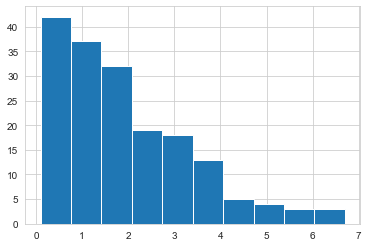

In [32]:
mid_df.value.hist()

In [33]:
goal_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
33,Emiliano,Martínez,2,1,26.1,48,450,1551322,7.1,34,6.8,Goalkeeper,Aston Villa,7.1,0.075556
394,Karl,Darlow,14,1,1.6,50,540,122229,6.0,30,5.0,Goalkeeper,Newcastle,6.0,0.055556
289,Illan,Meslier,10,1,3.8,45,540,241028,5.3,24,4.0,Goalkeeper,Leeds,5.3,0.044444
449,Alex,McCarthy,16,1,18.8,45,540,430454,5.3,24,4.0,Goalkeeper,Southampton,5.3,0.044444
536,Lukasz,Fabianski,19,1,1.5,50,540,29242,4.8,24,4.0,Goalkeeper,West Ham,4.8,0.044444
241,Kasper,Schmeichel,9,1,11.9,55,540,192525,4.5,25,4.2,Goalkeeper,Leicester,4.5,0.046296
562,Rui Pedro,dos Santos Patrício,20,1,7.7,55,540,253430,4.4,24,4.0,Goalkeeper,Wolves,4.4,0.044444
7,Bernd,Leno,1,1,9.5,50,540,328497,3.8,19,3.2,Goalkeeper,Arsenal,3.8,0.035185
516,Sam,Johnstone,18,1,0.9,45,450,36300,3.8,17,3.4,Goalkeeper,West Brom,3.8,0.037778
186,Jordan,Pickford,7,1,8.4,50,540,399981,3.4,17,2.8,Goalkeeper,Everton,3.4,0.031481


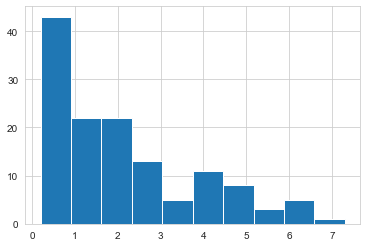

In [34]:
def_df.value.hist()

In [35]:
def_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
567,Romain,Saïss,20,2,18.9,52,517,1310298,7.3,38,6.3,Defender,Wolves,7.3,0.073501
129,Kurt,Zouma,5,2,4.6,51,450,308044,6.3,32,6.4,Defender,Chelsea,6.3,0.071111
52,Ezri,Konsa Ngoyo,2,2,8.0,47,450,618382,6.2,29,5.8,Defender,Aston Villa,6.2,0.064444
540,Aaron,Cresswell,19,2,6.0,50,540,389803,6.2,31,5.2,Defender,West Ham,6.2,0.057407
455,Jannik,Vestergaard,16,2,1.8,45,405,101549,6.0,27,5.4,Defender,Southampton,6.0,0.066667
264,Timothy,Castagne,9,2,20.7,58,540,1486830,6.0,35,5.8,Defender,Leicester,6.0,0.064815
47,Tyrone,Mings,2,2,10.2,52,450,654193,5.8,30,6.0,Defender,Aston Villa,5.8,0.066667
575,Max,Kilman,20,2,8.8,41,270,557458,5.6,23,7.7,Defender,Wolves,5.6,0.085185
262,James,Justin,9,2,21.6,48,540,1144028,5.4,26,4.3,Defender,Leicester,5.4,0.048148
141,Reece,James,5,2,10.9,50,363,946567,5.0,25,5.0,Defender,Chelsea,5.0,0.068871


In [36]:
mid_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
44,Wilfried,Zaha,6,3,22.2,72,540,1593329,6.7,48,8.0,Midfielder,Crystal Palace,6.7,0.088889
31,Jorge Luiz,Frello Filho,5,3,12.9,52,432,993350,6.7,35,7.0,Midfielder,Chelsea,6.7,0.081019
141,Heung-Min,Son,17,3,54.0,95,376,3885145,6.1,58,11.6,Midfielder,Spurs,6.1,0.154255
81,Hélder Wander,Sousa de Azevedo e Costa,10,3,9.4,57,487,938734,5.6,32,5.3,Midfielder,Leeds,5.6,0.065708
78,Mateusz,Klich,10,3,7.0,56,516,669607,5.4,30,5.0,Midfielder,Leeds,5.4,0.058140
9,Jack,Grealish,2,3,27.7,72,450,1585039,5.4,39,7.8,Midfielder,Aston Villa,5.4,0.086667
10,John,McGinn,2,3,2.6,55,450,190473,5.3,29,5.8,Midfielder,Aston Villa,5.3,0.064444
55,James,Rodríguez,7,3,38.9,80,509,2755131,5.1,41,6.8,Midfielder,Everton,5.1,0.080550
165,Jarrod,Bowen,19,3,2.2,63,502,146550,4.9,31,5.2,Midfielder,West Ham,4.9,0.061753
121,Jeff,Hendrick,14,3,3.6,50,520,430845,4.8,24,4.0,Midfielder,Newcastle,4.8,0.046154


In [37]:
fwd_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
278,Patrick,Bamford,10,4,26.9,59,490,2052092,8.3,49,8.2,Forward,Leeds,8.3,0.100000
417,Callum,Wilson,14,4,13.3,65,534,968310,6.3,41,6.8,Forward,Newcastle,6.3,0.076779
193,Dominic,Calvert-Lewin,7,4,56.7,77,518,3551715,5.7,44,7.3,Forward,Everton,5.7,0.084942
478,Harry,Kane,17,4,39.9,109,443,2144389,5.5,60,12.0,Forward,Spurs,5.5,0.135440
77,Neal,Maupay,3,4,6.9,66,450,558615,5.2,34,6.8,Forward,Brighton,5.2,0.075556
462,Che,Adams,16,4,1.7,58,495,86071,5.0,29,4.8,Forward,Southampton,5.0,0.058586
452,Danny,Ings,16,4,18.1,85,540,590838,4.8,41,6.8,Forward,Southampton,4.8,0.075926
61,Ollie,Watkins,2,4,5.0,60,450,438769,4.5,27,5.4,Forward,Aston Villa,4.5,0.060000
542,Michail,Antonio,19,4,4.0,63,481,117536,4.3,27,4.5,Forward,West Ham,4.3,0.056133
248,Jamie,Vardy,9,4,16.9,100,384,1032279,4.1,41,8.2,Forward,Leicester,4.1,0.106771


Text(0, 0.5, 'Value (Points/Cost)')

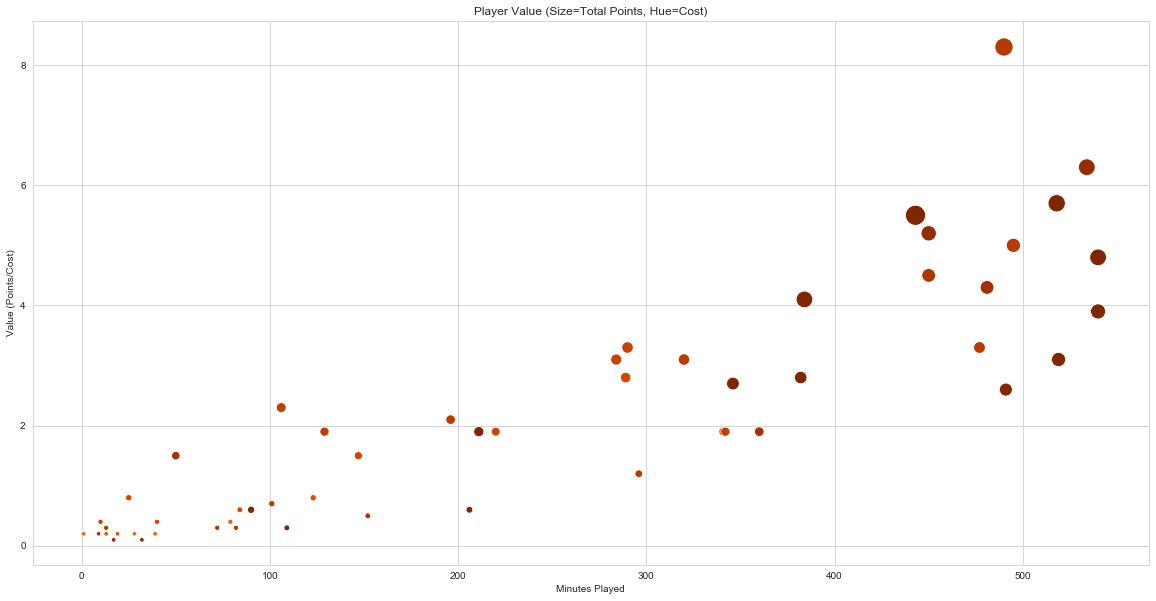

In [38]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=fwd_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))
plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

Text(0, 0.5, 'Value (Points/Cost)')

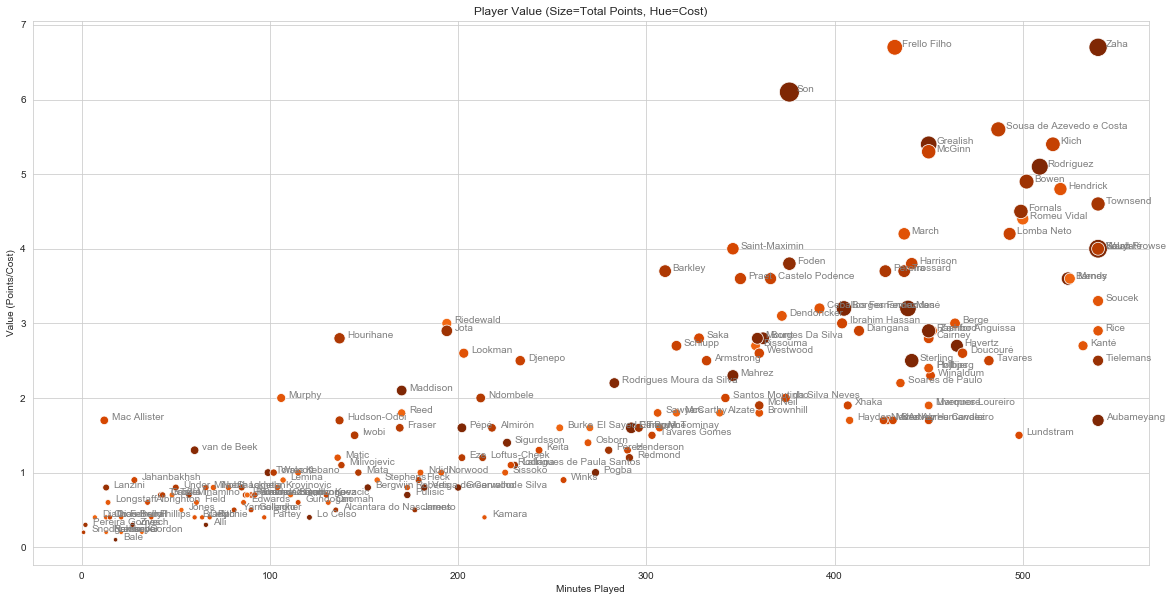

In [39]:
plt.figure(figsize=(20,10))
p1 = sns.scatterplot(data=mid_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))

for line in range(0,mid_df.shape[0]):
     p1.text(mid_df.minutes[line]+4, mid_df.value[line], mid_df.second_name[line], horizontalalignment='left', size='medium', color='grey', weight='light')

plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

In [40]:
mid_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,position,team_name,value,points_per_minute
44,Wilfried,Zaha,6,3,22.2,72,540,1593329,6.7,48,8.0,Midfielder,Crystal Palace,6.7,0.088889
31,Jorge Luiz,Frello Filho,5,3,12.9,52,432,993350,6.7,35,7.0,Midfielder,Chelsea,6.7,0.081019
141,Heung-Min,Son,17,3,54.0,95,376,3885145,6.1,58,11.6,Midfielder,Spurs,6.1,0.154255
81,Hélder Wander,Sousa de Azevedo e Costa,10,3,9.4,57,487,938734,5.6,32,5.3,Midfielder,Leeds,5.6,0.065708
78,Mateusz,Klich,10,3,7.0,56,516,669607,5.4,30,5.0,Midfielder,Leeds,5.4,0.058140
9,Jack,Grealish,2,3,27.7,72,450,1585039,5.4,39,7.8,Midfielder,Aston Villa,5.4,0.086667
10,John,McGinn,2,3,2.6,55,450,190473,5.3,29,5.8,Midfielder,Aston Villa,5.3,0.064444
55,James,Rodríguez,7,3,38.9,80,509,2755131,5.1,41,6.8,Midfielder,Everton,5.1,0.080550
165,Jarrod,Bowen,19,3,2.2,63,502,146550,4.9,31,5.2,Midfielder,West Ham,4.9,0.061753
121,Jeff,Hendrick,14,3,3.6,50,520,430845,4.8,24,4.0,Midfielder,Newcastle,4.8,0.046154


In [41]:
mid_df.minutes.loc[0:174]

0      540
1      407
2      202
3      328
4      362
      ... 
170    372
171    296
172    374
173    366
174    493
Name: minutes, Length: 175, dtype: int64

In [42]:
line

175

Text(0, 0.5, 'Value (Points/Cost)')

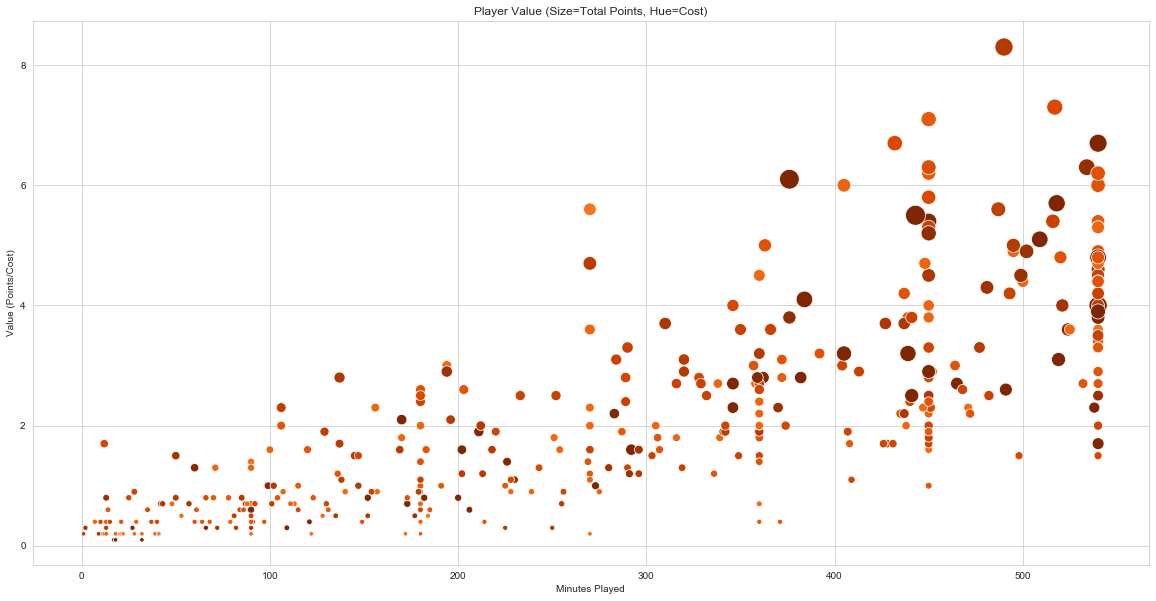

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=slim_elements_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))
plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

In [44]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1240,1250,1160,1210,1190,1230,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1130,1150,1140,1170,1120,1160,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1120,1110,1130,1100,1120,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1100,1130,1150,1010,1020,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,...,None,False,0,1250,1280,1180,1250,1230,1260,4
5,31,0,None,6,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1080,1120,1100,1130,1020,1040,6
6,11,0,None,7,0,Everton,0,0,0,EVE,...,None,False,0,1200,1210,1160,1220,1210,1240,7
7,54,0,None,8,0,Fulham,0,0,0,FUL,...,None,False,0,1000,1020,1020,1020,1000,1010,34
8,13,0,None,9,0,Leicester,0,0,0,LEI,...,None,False,0,1200,1240,1190,1230,1200,1230,26
9,2,0,None,10,0,Leeds,0,0,0,LEE,...,None,False,0,1090,1130,1110,1140,1100,1120,9


In [45]:
import altair as alt

In [46]:
alt.Chart(slim_elements_df).mark_circle(size=60).encode(
    x='minutes',
    y='value',
    color='now_cost',
    tooltip=['second_name', 'team_name', 'now_cost', 'total_points', 'points_per_game']
).interactive()

alt.Chart(...)